# Fake News Preprocessing Pipeline with SQLite Integration

This notebook loads validated fake and real news articles from a SQLite database and performs text preprocessing for modeling tasks.

It represents the **third step** in a four-part pipeline designed for fake news detection. This notebook focuses on text normalization, cleaning, and TF-IDF vectorization in preparation for model training and evaluation.

# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Mount Google Drive and Load Data from SQLite Database

In [ ]:
# Mount Google Drive for use with Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Path to database
db_path = '/content/drive/MyDrive/IS619_Project/fakenews.db'

# Connect and load from SQLite
conn = sqlite3.connect(db_path)
query = "SELECT title, body, subject, date, fakeNews FROM news_article"
df_all = pd.read_sql_query(query, conn)

# Rename columns for clarity
df_all.rename(columns={'fakeNews': 'label'}, inplace=True)
print(df_all['label'].value_counts())
df_all.head()


Mounted at /content/drive
label
FAKE    23471
REAL    21417
Name: count, dtype: int64


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                body   subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  POLITICS   
1  WASHINGTON (Reuters) - Transgender people will...  POLITICS   
2  WASHINGTON (Reuters) - The special counsel inv...  POLITICS   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  POLITICS   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  POLITICS   

                 date label  
0  December 31, 2017   REAL  
1  December 29, 2017   REAL  
2  December 31, 2017   REAL  
3  December 30, 2017   REAL  
4  December 29, 2017   REAL

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('body').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('body')):
  _plot_series(series, series_name, i)
  fig.legend(title='body', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['body'].value_counts()
    for x_label, grp in _df_6.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('body')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['date'].value_counts()
    for x_label, grp in _df_7.groupby('body')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('body')
_ = plt.ylabel('date')

#Text Preprocessing

In [ ]:
# Load English stopwords (e.g., "the", "and", "is")
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer to reduce words to their base form
lemmatizer = WordNetLemmatizer()

# Define a preprocessing function for cleaning text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()  # Tokenize into individual words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize each word
    return ' '.join(tokens)  # Recombine tokens into a cleaned string

# Apply the function to the 'title' column and store results in a new column
df_all['clean_title'] = df_all['title'].apply(preprocess_text)

# Display original and cleaned headlines side by side
df_all[['title', 'clean_title']].head()


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                         clean_title  
0  u budget fight loom republican flip fiscal script  
1  u military accept transgender recruit monday p...  
2     senior u republican senator let mr mueller job  
3  fbi russia probe helped australian diplomat ti...  
4  trump want postal service charge much amazon s...

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('clean_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clean_title'].value_counts()
    for x_label, grp in _df_10.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('clean_title')

#Headline Length Distribution Visualization

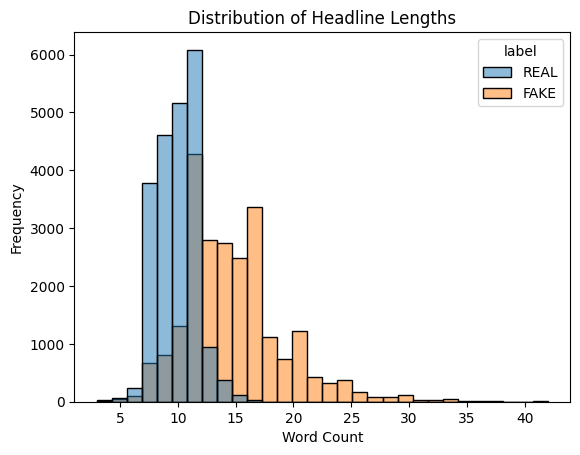

In [ ]:
# Create a new column that stores the number of words in each headline
df_all['title_length'] = df_all['title'].apply(lambda x: len(x.split()))

# Plot a histogram of headline lengths, grouped by FAKE vs REAL label
sns.histplot(df_all, x='title_length', hue='label', bins=30)

# Add plot title and axis labels
plt.title('Distribution of Headline Lengths')  # Chart title
plt.xlabel('Word Count')  # X-axis: number of words in each headline
plt.ylabel('Frequency')   # Y-axis: number of headlines in each bin

# Display the plot
plt.show()

#Word Cloud Visualization

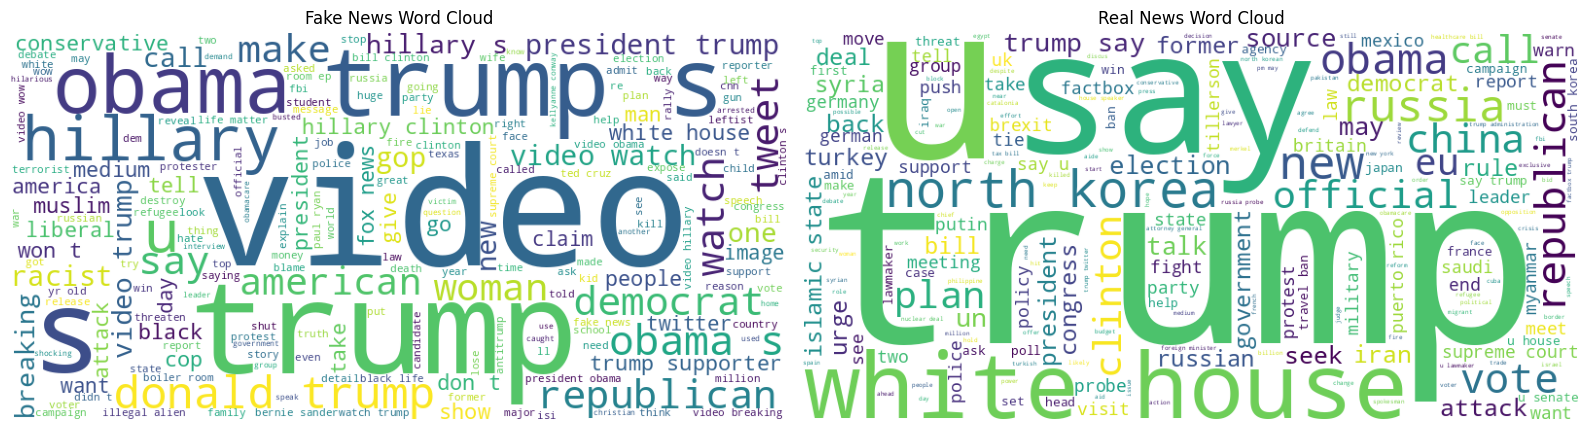

In [ ]:
# Join all cleaned headlines into a single string for each class
fake_words = ' '.join(df_all[df_all['label'] == 'FAKE']['clean_title'])
real_words = ' '.join(df_all[df_all['label'] == 'REAL']['clean_title'])

# Create a side-by-side plot for the two word clouds
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Generate and display word cloud for FAKE headlines
ax[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(fake_words))
ax[0].set_title('Fake News Word Cloud')  # Title for left plot
ax[0].axis('off')  # Remove axis ticks

# Generate and display word cloud for REAL headlines
ax[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(real_words))
ax[1].set_title('Real News Word Cloud')  # Title for right plot
ax[1].axis('off')  # Remove axis ticks

# Optimize layout and display the plot
plt.tight_layout()
plt.show()


#TF-IDF Vectorization

In [ ]:
# Initialize the TF-IDF vectorizer with a vocabulary size limit of 5,000
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned headline text into a sparse TF-IDF matrix
X_tfidf = tfidf.fit_transform(df_all['clean_title'])

# Output the shape of the resulting matrix (rows = articles, columns = top terms)
print(f'TF-IDF matrix shape: {X_tfidf.shape}')


TF-IDF matrix shape: (44888, 5000)


# Bar Plot of Top TF-IDF Terms

/tmp/ipython-input-8-2052094703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='term', data=top_terms, palette='viridis')


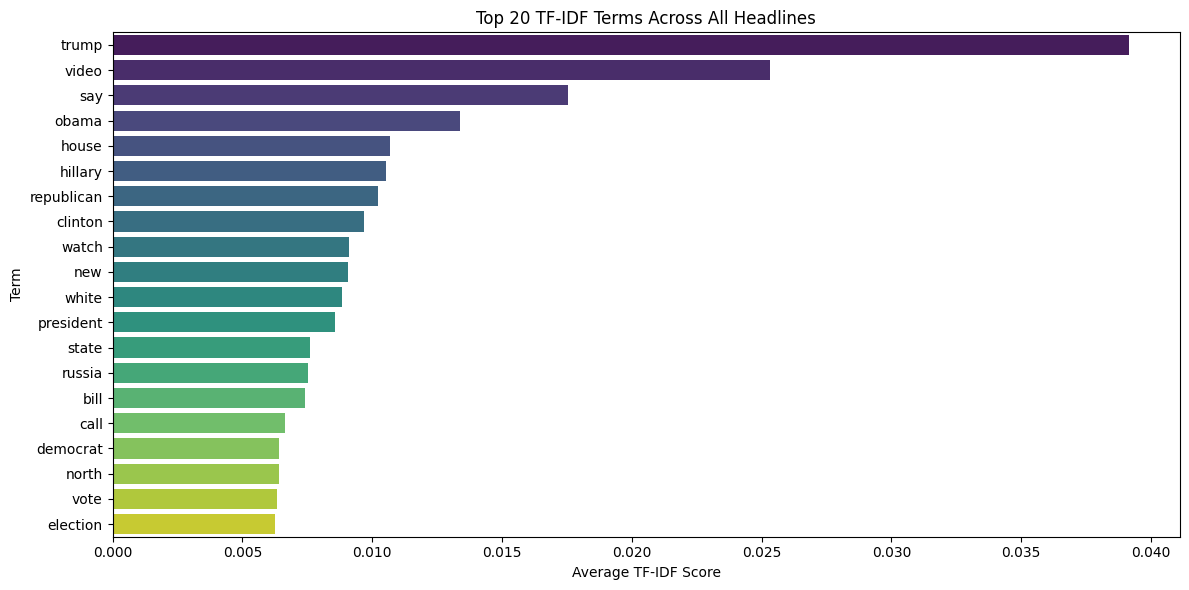

In [ ]:
# Compute the mean TF-IDF score for each word across all articles
mean_tfidf = np.asarray(X_tfidf.mean(axis=0)).flatten()
terms = tfidf.get_feature_names_out()

# Create a DataFrame for visualization
tfidf_df = pd.DataFrame({'term': terms, 'score': mean_tfidf})
top_terms = tfidf_df.sort_values(by='score', ascending=False).head(20)

# Plot the top 20 highest-scoring TF-IDF terms
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='term', data=top_terms, palette='viridis')
plt.title('Top 20 TF-IDF Terms Across All Headlines')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Term')
plt.tight_layout()
plt.show()